In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')





In [3]:
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [4]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [5]:
# Optional PCA for 2D visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

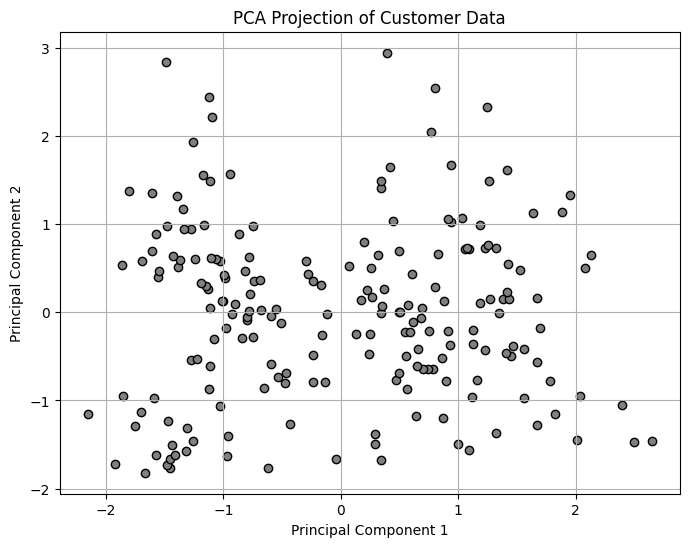

In [6]:
# Visualize the PCA projection
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c='gray', edgecolor='k')
plt.title('PCA Projection of Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [7]:
# Step 3: Use Elbow Method to find optimal K
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)


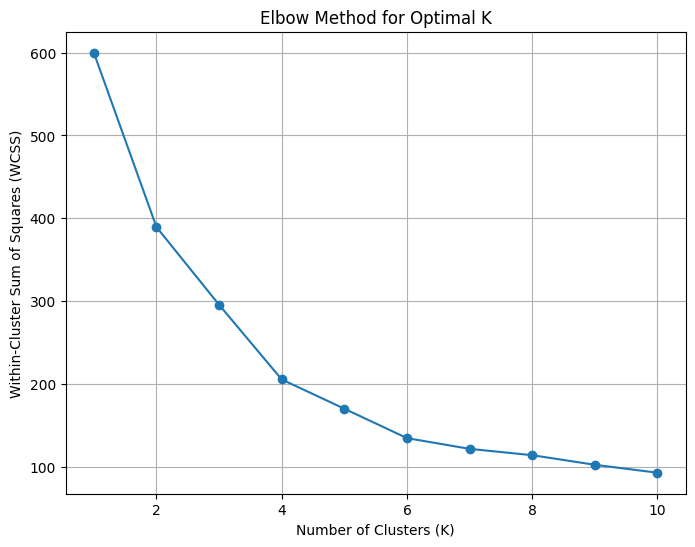

In [8]:
# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()


In [9]:
# Step 4: Fit KMeans with optimal K (assume K=5 from elbow plot)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

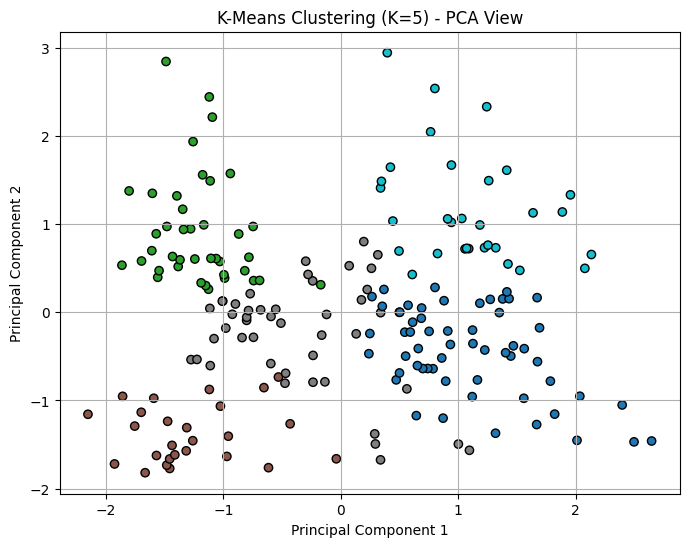

In [10]:
# Visualize clusters using PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='tab10', edgecolor='k')
plt.title(f'K-Means Clustering (K={optimal_k}) - PCA View')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [11]:
# 5. Evaluate clustering using Silhouette Score
sil_score = silhouette_score(scaled_features, cluster_labels)
print(f"Silhouette Score for K={optimal_k}: {sil_score:.3f}")

Silhouette Score for K=5: 0.408
